In [2]:
%matplotlib inline

In [1]:
from copy import copy
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from random import choice, sample, shuffle
import scipy.stats as stat

In [3]:
def half_frame(sub, xaxis_label, yaxis_label, font_size = 15, padding = -0.02):
    """Formats frame, axes, and ticks for matplotlib made graphic with half frame."""

    # Format graph frame and tick marks
    sub.yaxis.set_ticks_position('left')
    sub.xaxis.set_ticks_position('bottom')
    sub.tick_params(axis = 'both', which = 'major', length = 7, width = 2, direction = 'out', pad = 10,
                    labelsize = font_size)
    sub.tick_params(axis = 'both', which = 'minor', length = 5, width = 2, direction = 'out', labelsize = 10)
    for axis in ['bottom','left']:
        sub.spines[axis].set_linewidth(2)
        sub.spines[axis].set_position(("axes", padding))
    for axis in ['top','right']:
        sub.spines[axis].set_visible(False)

    # Format axes
    sub.set_xlabel(xaxis_label, fontsize = 1.6 * font_size)
    sub.set_ylabel(yaxis_label, fontsize = 1.6 * font_size)
    
    return

In [6]:
with open("./gpa_data.csv", "r") as data_file:
    all_lines = data_file.readlines()

gpa_list = []
for line in all_lines[1:]:      # Ignore first line with field names
    gpa_list.append( line.strip().split(",") )
    
print(len(gpa_list), gpa_list[:3])
    
gpa = []
for x in gpa_list:
    try:
        if (float(x[1]) == 4.):  # consider only cases for which maximum GPA is 4.0
            try:
                gpa.append(float(x[0]))
            except:
                pass
    except:
        pass

print(len(gpa), gpa[:3])


364 [['9.1', '10'], ['"3.61', ' 3.65 (updated)"', '4'], ['3.27', '4']]
237 [3.27, 3.966, 3.25]


In [7]:
group1_gpas = []
group2_gpas = []
for item in gpa:
    if choice([1,2]) == 1:
        group1_gpas.append(item)
    else:
        group2_gpas.append(item)
        

# Synopsis

In this unit we will:

* Define descriptive and inferential statistics
* Demonstrate decriptive and inferential statistics in Python
* Cover basic bootstrapping methods for data analysis

# Statistics

**Statistics is the science concerned with the study of the collection, analysis, interpretation, presentation, and organization of data.**

For concreteness let us consider two examples that hopefully you can relate to.

The US Census Bureau collects data on people residing in the US. The data includes measures such as the number of household occupants, their gender, their age, their familial relationships, their incomes, their education levels, and so on. The process for the data collection is called a **census** because the process aims to measure all individuals.

Colleges collect applications for their programs. The data collected includes standardized test scores, GPAs, essays, recommendation letters, and so on. No college is able to collect a census, so each must make decisions based on the **sample** of applicants. Each college is able to analyze a sample comprising a very small fraction of all students applying to college each year.  

### GPAs of applicants to Chemical Engineering Graduate Program

In order to explore this type of statistical analysis with Python, we will study the undergraduate GPA of the applicants to the Chemical Engineering Graduate Program in 2014.


# Descriptive statistics

The first step in the analysis of data is to to obtain a description that summarizes its statistical properties. There are a number of statistics (that is, measures that can be calculated for that data) that are particularly useful.

**Number of observations** is the number of data in the data set. In this case, the number of applicants for which we have GPA values.

**Minimum** is the smallest value in the data set.

**Maximum** is the largest value in the data set. For the GPA data, this is presumably 4.0.

**Support** (also called range) is the interval over which the values of the data set spread. Since GAPs are positive and must be no larger that 4, we know that the range must be a subset of the interval [0, 4]. Presumably, students will GPAs lower than 2 will not apply to a graduate program, so the support of our GPA data will likely be a subset of the interval [2, 4].

**Mode** is the most common value in the data set.  

**Median** is the value that is larger than half of all values and smaller than half of all values in the data set. The median is an example of a *percentile*.  Two other common percentiles are the *first quartile* and the *third quartile*.

**Sample Mean** (also called sample average) is the sum of all values divided by the number of observations.  The sample mean has the smallest distance to the set of all values in the sample.

**Standard deviation** is a measure of the spread around the sample mean for the values in the data set.

**Skewness** is a measure of the asymmetry of the values in the data set. If you divide the support of the data at the sample mean, and if one of the interval is longer than the other, than the data is skewed.

These quantities can all be easily obtained used methods already coded in `Scipy` and `Numpy`.

In [22]:
mode1 = float(stat.mode(group1_gpas)[0])
mode2 = float(stat.mode(group2_gpas)[0])
print("The mode of the sample is {0:4.2f}".format(mode1))

first_quartile1 = stat.scoreatpercentile(group1_gpas, 25)
first_quartile2 = stat.scoreatpercentile(group2_gpas, 25)
print("The first quartile of the sample is {0:4.2f}".format(first_quartile1))

median1 = stat.scoreatpercentile(group1_gpas, 50)
median2 = stat.scoreatpercentile(group2_gpas, 50)
print("The median of the sample is {0:4.2f}".format(median1))

third_quartile1 = stat.scoreatpercentile(group1_gpas, 75)
third_quartile2 = stat.scoreatpercentile(group2_gpas, 75)
print("The third quartile of the sample is {0:4.2f}".format(third_quartile1))

skew1 = stat.skew(group1_gpas)
skew2 = stat.skew(group2_gpas)
print("The skewness of the sample is {0:5.3f}".format(skew1))

The mode of the sample is 3.57
The first quartile of the sample is 3.47
The median of the sample is 3.63
The third quartile of the sample is 3.76
The skewness of the sample is -1.046


In [9]:
results = stat.describe(group1_gpas)
print(results)

print()

results = stat.describe(group2_gpas)
print(results)


DescribeResult(nobs=121, minmax=(2.5099999999999998, 4.0), mean=3.5950247933884296, variance=0.06948759104683197, skewness=-1.045940741169575, kurtosis=1.6221099565187922)

DescribeResult(nobs=116, minmax=(2.5699999999999998, 4.0), mean=3.6237241379310348, variance=0.072028010194902542, skewness=-0.862523489004057, kurtosis=0.8955117004398927)


### Plot the distribution

While descriptive statistics are very useful, their calculation involves the loss of a lot of information on the data. Obtaining an histogram of the data values gives a much more accurate picture of the statistical properties of the data as long as the histogram is calculated properly.


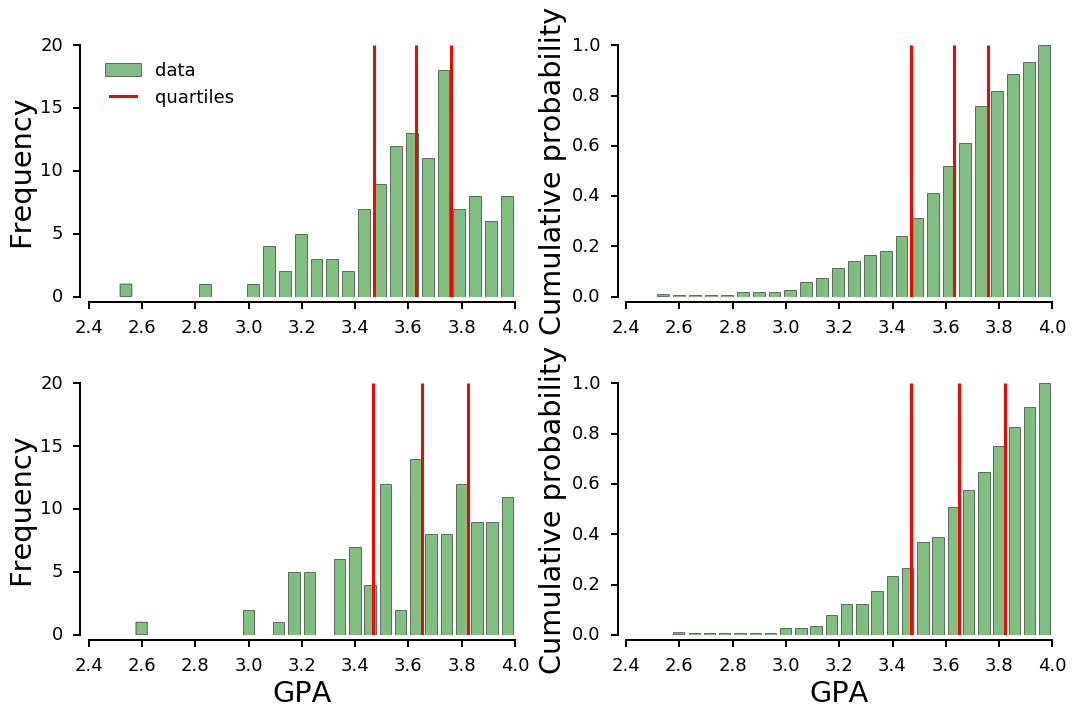

In [26]:
fig = plt.figure( figsize = (15.0, 10.0) )
my_font_size = 18

# Calculate and plot frequency 
#
sub1 = fig.add_subplot(2,2,1)
half_frame(sub1, "", "Frequency", font_size = my_font_size)
sub1.hist(group1_gpas, 25, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)
sub1.vlines([first_quartile1, median1, third_quartile1], ymin = 0, ymax = 20, lw = 3, color = "red", 
            label = "quartiles")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

# Plot cumulative probability
#
sub2 = fig.add_subplot(2,2,2)
half_frame(sub2, "", "Cumulative probability", font_size = my_font_size)
sub2.hist(group1_gpas, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True)
sub2.vlines([first_quartile1, median1, third_quartile1], ymin = 0, ymax = 1., lw = 3, color = "red", 
            label = "quartiles")
sub2.set_ylim([0, 1])

# Calculate and plot frequency
#
sub3 = fig.add_subplot(2,2,3)
half_frame(sub3, "GPA", "Frequency", font_size = my_font_size)
sub3.hist(group2_gpas, 25, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = False)
sub3.vlines([first_quartile2, median2, third_quartile2], ymin = 0, ymax = 20, lw = 3, color = "red", 
            label = "quartiles")

# Format legend
sub1.legend(loc = "best", frameon = False, markerscale = 1.8, fontsize = my_font_size)

# Plot cumulative probability
#
sub4 = fig.add_subplot(2,2,4)
half_frame(sub4, "GPA", "Cumulative probability", font_size = my_font_size)
sub4.hist(group2_gpas, 25, normed = 1, rwidth = 0.75, color = "g", alpha = 0.5, histtype = "bar", 
          label = "data", cumulative = True)
sub4.vlines([first_quartile2, median2, third_quartile2], ymin = 0, ymax = 1., lw = 3, color = "red", 
            label = "quartiles")

plt.tight_layout()


The question we may want to answer with our data is whether Group1 and Group2 have similar distributions of GPAs. Looking at the frequency plot, one could be tempted to say maybe... The cumulative probability plot, however, suggest that probably not.  How do we decide?  


# Inferential statistics

The goal of descriptive statistics is to gain sufficient insight into our data to enable us to develop hypotheses about what process generated the data or whether different samples were drawn from the same distribution. **These hypotheses are called null models**.

The process can be a physical model, which may or may not predict the value of the parameters necessary to describe the statistical properties of the data. The process can also be a statistical model.

Using inferential statistics, one determines whether a given null hypothesis is consistent with the data. Let's test the null hypothesis using a few standard methods.

### Student's t-test

Among the most frequently used t-tests are:

* A one-sample location test of whether the mean of a population has a value specified in a null hypothesis.
    
* A two-sample location test of the null hypothesis such that the means of two populations are equal. All such tests are usually called Student's t-tests, though strictly speaking that name should only be used if the variances of the two populations are also assumed to be equal; the form of the test used when this assumption is dropped is sometimes called Welch's t-test.[8] These tests are often referred to as "unpaired" or "independent samples" t-tests, as they are typically applied when the statistical units underlying the two samples being compared are non-overlapping.
    
* A test of the null hypothesis that the difference between two responses measured on the same statistical unit has a mean value of zero. For example, suppose we measure the size of a cancer patient's tumor before and after a treatment. If the treatment is effective, we expect the tumor size for many of the patients to be smaller following the treatment. This is often referred to as the "paired" or "repeated measures" t-test.
    
* A test of whether the slope of a regression line differs significantly from 0.

The t-test assumes that:

* The sample means follow a normal distribution.
* ps^2 follows a χ2 distribution with p degrees of freedom under the null hypothesis, where p is a positive constant, and s is the ratio of sample standard deviation over population standard deviation.
* Z and s are independent.


In [27]:
# Using t-test

t, p = stat.ttest_ind(group1_gpas, group2_gpas, equal_var = False)
print('t test: \t t =  {0:6.4f}  \t p = {1:6.4f}'.format(t, p) )

t test: 	 t =  -0.8301  	 p = 0.4073


### Kolmogorov–Smirnov test

The Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). 

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In each case, the distributions considered under the null hypothesis are continuous distributions but are otherwise unrestricted.

In [28]:
# Using Kolmogorov-Smirnov test

D, p = stat.ks_2samp(group1_gpas, group2_gpas)
print('KS 2 sample test: \t  D =  {0:6.4f}  \t p = {1:6.4f}'.format(D, p) )

KS 2 sample test: 	  D =  0.1569  	 p = 0.0978


### $\chi^2$ test

The $\chi^2$ test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

$\chi^2$ tests are often constructed from a **sum of squared errors**, or through the **sample variance**. Test statistics that follow a $\chi^2$ distribution arise from an assumption of independent normally distributed data, which is valid in many cases due to the central limit theorem.  Also considered a $\chi^2$ test is a test in which this is asymptotically true, meaning that the sampling distribution (if the null hypothesis is true) can be made to approximate a chi-squared distribution as closely as desired by making the sample size large enough.

A $\chi^2$ test can be used to attempt rejection of the null hypothesis that the data are independent.

The $\chi^2$ test requires three conditions to be satisfied: 1) the data is obtained by simple random sampling, 2) the data is categorical, and 3) the expected number of observations for every category is at least 5.
